In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# **1-DATA EXPOLARTION:**

In [2]:
# Load the dataset
df = pd.read_csv('kick_starter.csv')

In [3]:
# Display the first few rows
print(df.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

In [4]:
# Display the summary information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [5]:
# Display summary statistics
print(df.describe())

                 ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.382635e+08  2.000000e+03  3.000000e+01       2.000000  1.698000e+01   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
75%    1.610149e+09  1.600000e+04  4.076000e+03      56.000000  3.034090e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  
count      3.786610e+05   3.786610e+05  
mean       9.058924e+03   4.545440e+04  
std        9.097334e+04   1.152950e+06  
min        0.000000e+00   1.000000e-02  
25%        3.100000e+01   2.000000e+03  
50%        6.243300e+02   5.50000

#Explore Categorical Features:

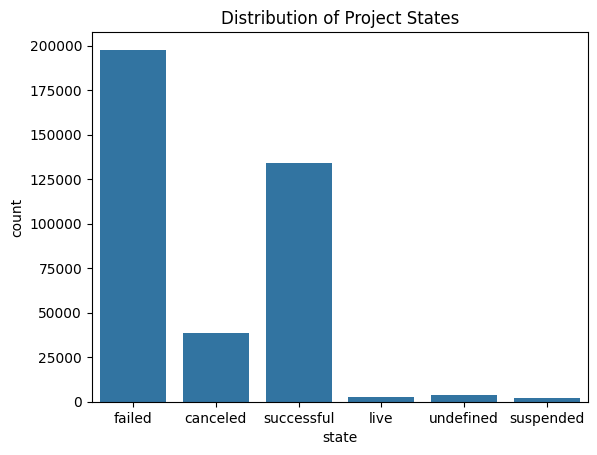

state
failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: proportion, dtype: float64


In [6]:

# Plot the distribution of the state
sns.countplot(x='state', data=df)
plt.title('Distribution of Project States')
plt.show()

# Calculate the percentage of successful projects
success_rate = df['state'].value_counts(normalize=True) * 100
print(success_rate)


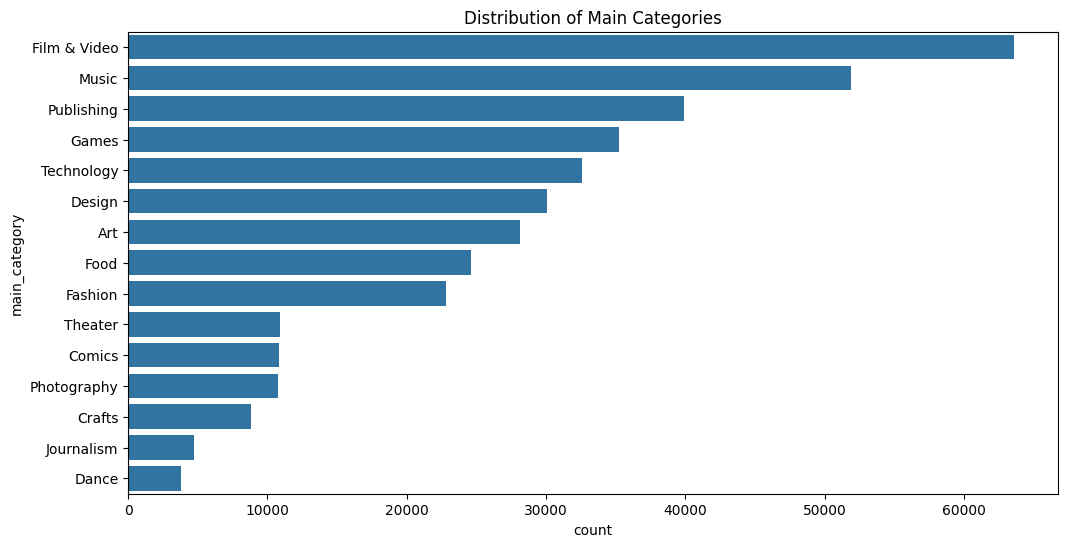

In [7]:
# Plot the distribution of main categories
plt.figure(figsize=(12, 6))
sns.countplot(y='main_category', data=df, order=df['main_category'].value_counts().index)
plt.title('Distribution of Main Categories')
plt.show()



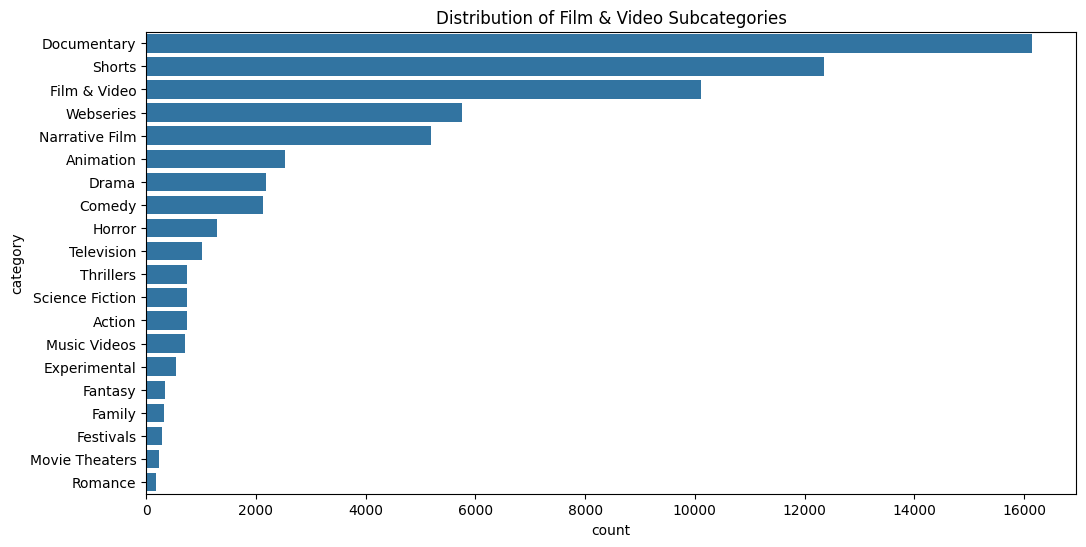

In [8]:
# Plot the distribution of categories within a main category (e.g., Technology)
tech_categories = df[df['main_category'] == 'Film & Video']
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=tech_categories, order=tech_categories['category'].value_counts().index)
plt.title('Distribution of Film & Video Subcategories')
plt.show()


#  Relationship Exploration:

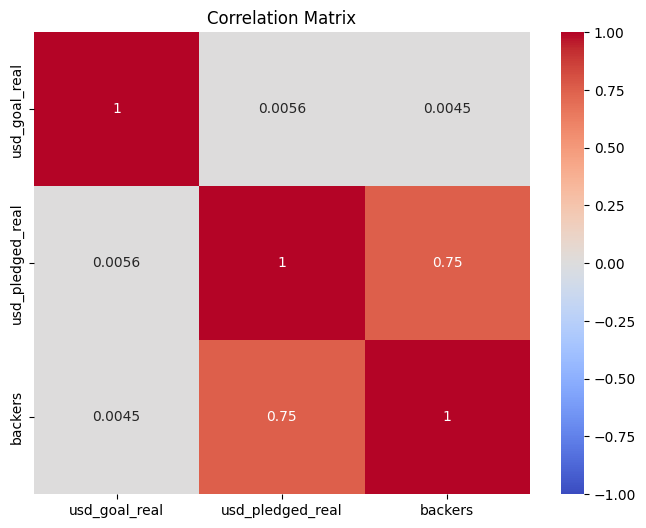

In [9]:
# Compute the correlation matrix
corr_matrix = df[['usd_goal_real', 'usd_pledged_real', 'backers']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


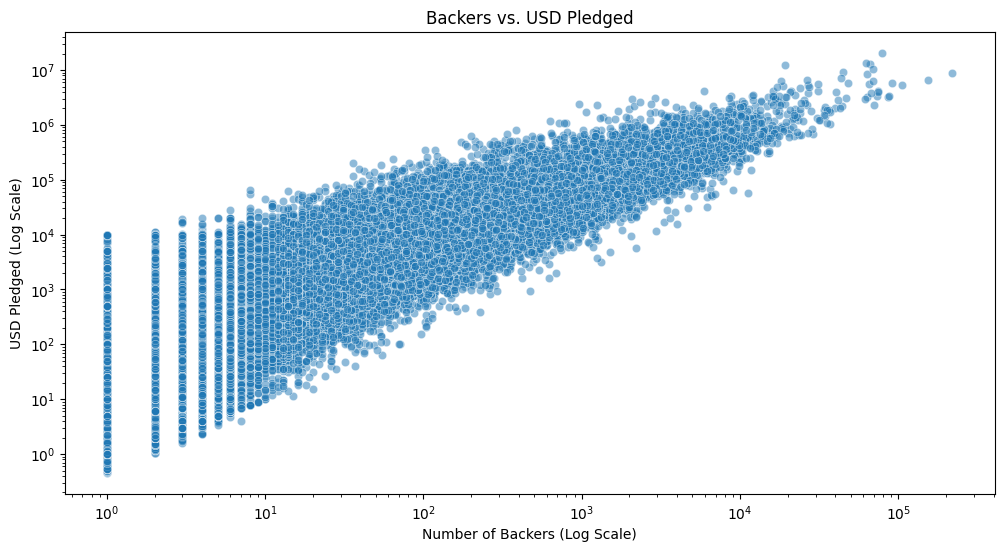

In [10]:
# Scatter plot of backers vs. usd_pledged_real
plt.figure(figsize=(12, 6))
sns.scatterplot(x='backers', y='usd_pledged_real', data=df, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Backers (Log Scale)')
plt.ylabel('USD Pledged (Log Scale)')
plt.title('Backers vs. USD Pledged')
plt.show()


# Temporal Analysis:

<ipython-input-11-3b4ca009584e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='launch_year', data=df, palette='viridis')


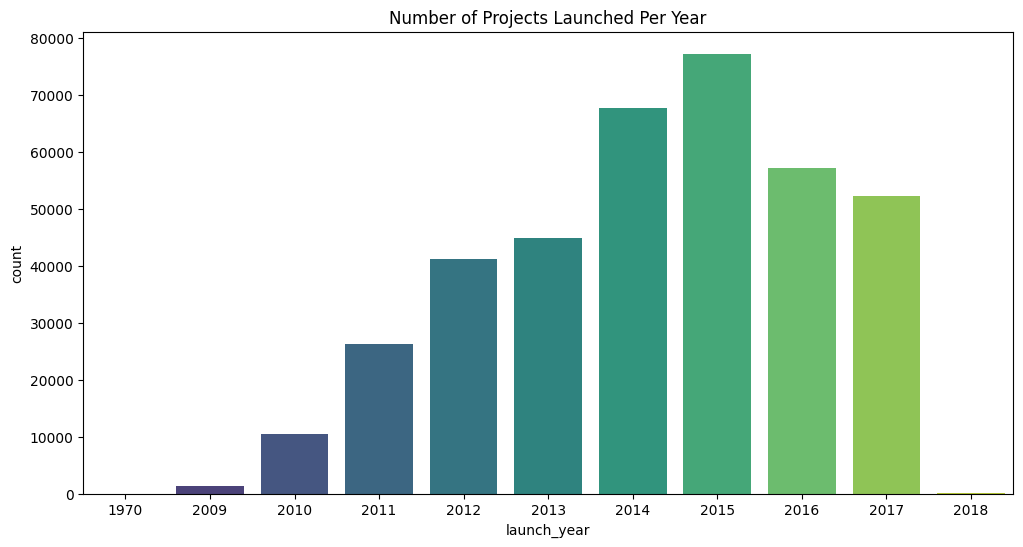

In [11]:
# Extract year and month from the launch date
# Convert 'launched' column to datetime format
df['launched'] = pd.to_datetime(df['launched'])

df['launch_year'] = df['launched'].dt.year
df['launch_month'] = df['launched'].dt.month

# Plot the number of projects launched per year
plt.figure(figsize=(12, 6))
sns.countplot(x='launch_year', data=df, palette='viridis')
plt.title('Number of Projects Launched Per Year')
plt.show()



<ipython-input-12-b4fba90f490d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='launch_month', data=df, palette='viridis')


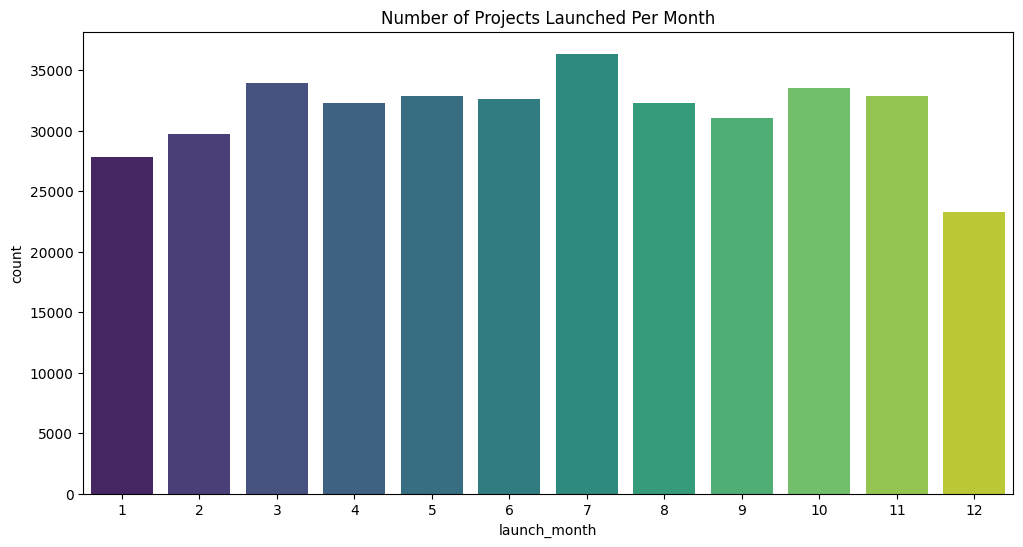

In [12]:

# Plot the number of projects launched per month
plt.figure(figsize=(12, 6))
sns.countplot(x='launch_month', data=df, palette='viridis')
plt.title('Number of Projects Launched Per Month')
plt.show()

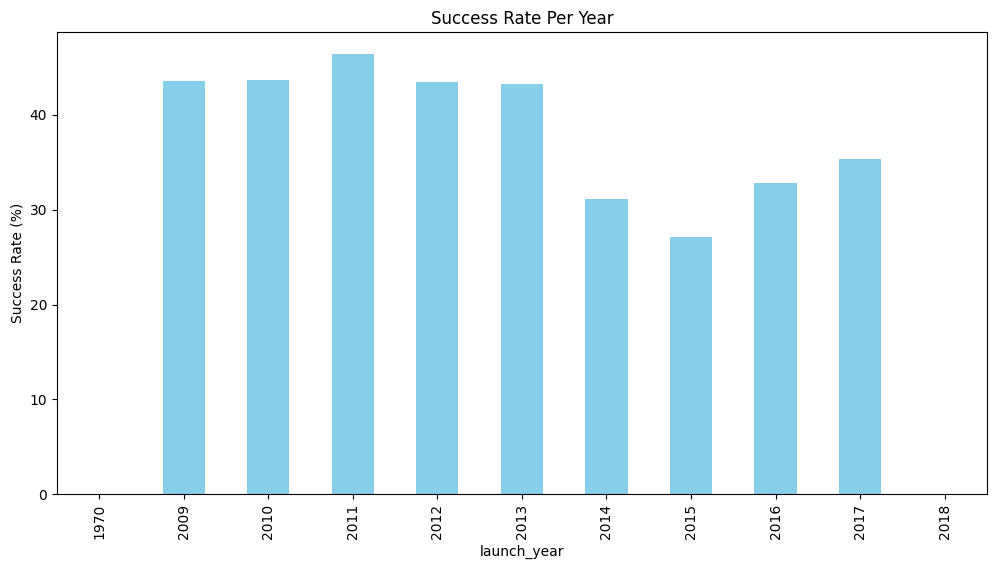

In [13]:
# Convert 'state' column to binary values (0 for failed, 1 for successful)
df['state_binary'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0)

# Calculate success rate per year
success_rate_per_year = df.groupby('launch_year')['state_binary'].mean() * 100

# Plot success rate per year
plt.figure(figsize=(12, 6))
success_rate_per_year.plot(kind='bar', color='skyblue')
plt.title('Success Rate Per Year')
plt.ylabel('Success Rate (%)')
plt.show()


#2- Data Cleaning:

In [14]:
# Check for missing values
print(df.isnull().sum())


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
launch_year            0
launch_month           0
state_binary           0
dtype: int64


In [15]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [16]:
imputer = IterativeImputer(max_iter=10, random_state=0)

# Select only the relevant columns for imputation
columns_for_imputation = ['usd pledged', 'goal', 'usd_pledged_real', 'usd_goal_real', 'backers']
df_impute = df[columns_for_imputation]

# Apply the imputation
df_imputed = imputer.fit_transform(df_impute)

# Convert the imputed array back to a dataframe
df_imputed = pd.DataFrame(df_imputed, columns=columns_for_imputation)

# Replace the original 'usd pledged' column with the imputed values
df['usd pledged'] = df_imputed['usd pledged']



In [17]:
# Check if there are any remaining missing values

print(df.isnull().sum())


ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
launch_year         0
launch_month        0
state_binary        0
dtype: int64


In [18]:
# Remove rows with missing 'name' values
df.dropna(subset=['name'], inplace=True)

In [19]:
# Check if 'name' column has any missing values now
print(df.isnull().sum())


ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
launch_year         0
launch_month        0
state_binary        0
dtype: int64


In [20]:
# Check unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()


Column: ID
Unique Values: [1000002330 1000003930 1000004038 ...  999986353  999987933  999988282]

Column: name
Unique Values: ['The Songs of Adelaide & Abullah'
 'Greeting From Earth: ZGAC Arts Capsule For ET' 'Where is Hank?' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!']

Column: category
Unique Values: ['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks'

In [21]:
# Check value counts for categorical columns
categorical_columns = ['name', 'category', 'main_category', 'currency', 'state', 'country','launch_year']
for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: name
name
New EP/Music Development                                       41
Canceled (Canceled)                                            13
N/A (Canceled)                                                 11
Music Video                                                    11
Cancelled (Canceled)                                           10
                                                               ..
Urbex : Le Projet Secret (Film)                                 1
Help VITA to record new album to come back his girl!            1
Launch children's book, Magic, Giggles & Love in hard cover     1
Varanasi Silks                                                  1
Nou Renmen Ayiti!  We Love Haiti!                               1
Name: count, Length: 375764, dtype: int64

Column: category
category
Product Design     22313
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress 

In [22]:
# Check for outliers or unexpected values in numerical columns
numerical_columns = ['goal', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'backers', 'launch_year', 'launch_month','state_binary']
for column in numerical_columns:
    print(f"Column: {column}")
    print(df[column].describe())
    print()

Column: goal
count    3.786570e+05
mean     4.908068e+04
std      1.183397e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.200000e+03
75%      1.600000e+04
max      1.000000e+08
Name: goal, dtype: float64

Column: pledged
count    3.786570e+05
mean     9.683080e+03
std      9.563651e+04
min      0.000000e+00
25%      3.000000e+01
50%      6.200000e+02
75%      4.076000e+03
max      2.033899e+07
Name: pledged, dtype: float64

Column: usd pledged
count    3.786570e+05
mean     6.986783e+03
std      7.832126e+04
min     -2.025410e+02
25%      1.577000e+01
50%      3.936800e+02
75%      3.030000e+03
max      2.033899e+07
Name: usd pledged, dtype: float64

Column: usd_pledged_real
count    3.786570e+05
mean     9.059018e+03
std      9.097382e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.243800e+02
75%      4.050000e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

Column: usd_goal_real
count    3.786570e+05
mean     4.545425e+04
std      1.152956e+06


In [23]:
print(df)


                ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015

In [24]:
df.to_csv('cleaned_kickstarter_data.csv', index=False)



In [25]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=af968abee0b4de9a0c1121661946656f86bbf70cd971a9d9f85d4a5f3beca746
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, month, avg, count, when, expr,desc
from pyspark.ml.feature import Imputer
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
spark = SparkSession.builder \
    .appName("Kickstarter Analysis") \
    .getOrCreate()

# Load the dataset
data = spark.read.csv('cleaned_kickstarter_data.csv', header=True, inferSchema=True)
data.printSchema()


root
 |-- ID: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- main_category: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- deadline: string (nullable = true)
 |-- goal: string (nullable = true)
 |-- launched: string (nullable = true)
 |-- pledged: string (nullable = true)
 |-- state: string (nullable = true)
 |-- backers: string (nullable = true)
 |-- country: string (nullable = true)
 |-- usd pledged: string (nullable = true)
 |-- usd_pledged_real: string (nullable = true)
 |-- usd_goal_real: string (nullable = true)
 |-- launch_year: string (nullable = true)
 |-- launch_month: double (nullable = true)
 |-- state_binary: double (nullable = true)



In [32]:
data.show(50)

+----------+--------------------+--------------+-------------+--------+----------+--------+-------------------+--------+----------+-------+-------+-----------+----------------+-------------+-----------+------------+------------+
|        ID|                name|      category|main_category|currency|  deadline|    goal|           launched| pledged|     state|backers|country|usd pledged|usd_pledged_real|usd_goal_real|launch_year|launch_month|state_binary|
+----------+--------------------+--------------+-------------+--------+----------+--------+-------------------+--------+----------+-------+-------+-----------+----------------+-------------+-----------+------------+------------+
|1000002330|The Songs of Adel...|        Poetry|   Publishing|     GBP|2015-10-09|  1000.0|2015-08-11 12:12:28|     0.0|    failed|      0|     GB|        0.0|             0.0|      1533.95|       2015|         8.0|         0.0|
|1000003930|Greeting From Ear...|Narrative Film| Film & Video|     USD|2017-11-01| 3

# Queries :


1-**What are the top 3 main categories in terms of the number of successful crowdfunding projects on Kickstarter for each year, and how do these categories change over time?**

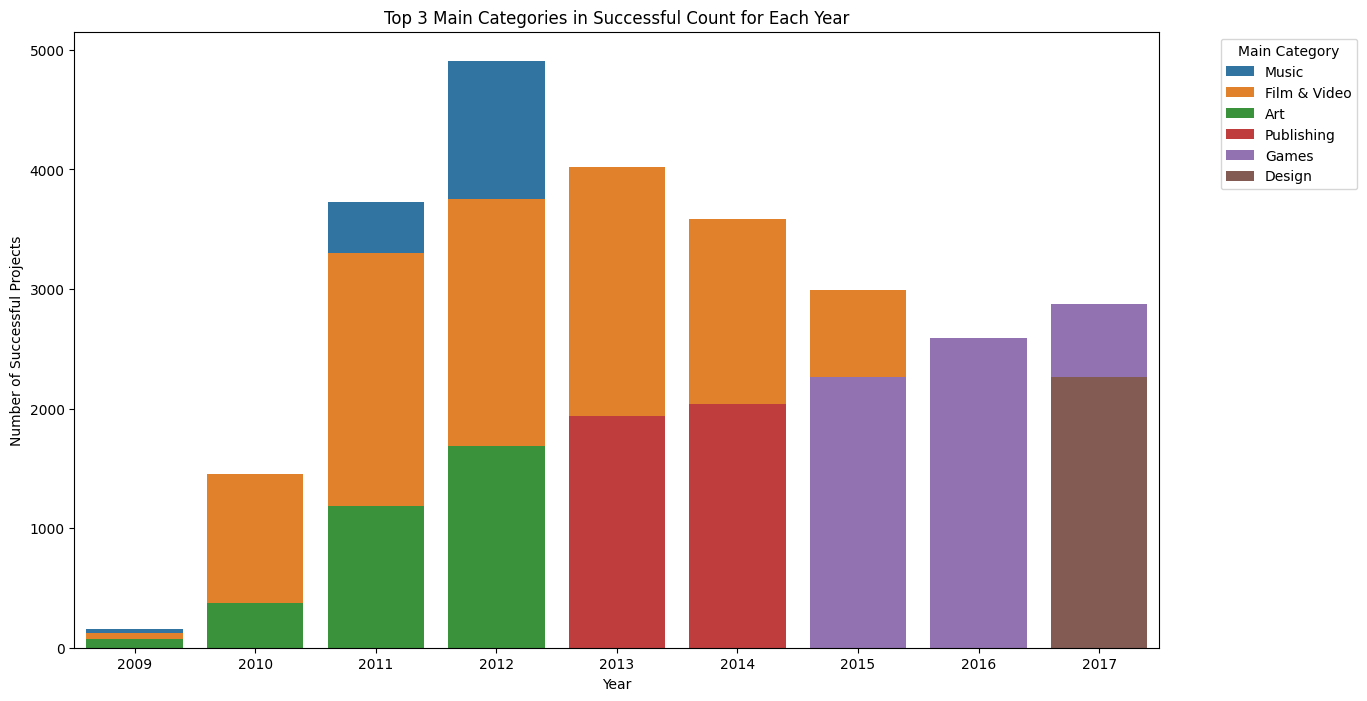

In [33]:
from pyspark.sql import Window
from pyspark.sql.functions import col, count, desc, row_number
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your PySpark DataFrame

# Filter the data to include only successful projects
successful_projects = data.filter(col('state') == 'successful')

# Group by 'launch_year' and 'main_category' to count successful projects
successful_counts = successful_projects.groupby('launch_year', 'main_category') \
                                       .agg(count('*').alias('successful_count'))

# Define a window spec to rank categories within each year
window_spec = Window.partitionBy('launch_year').orderBy(desc('successful_count'))

# Add a rank column to identify the top categories per year
ranked_categories = successful_counts.withColumn('rank', row_number().over(window_spec))

# Filter to keep only the top 3 categories per year
top_categories_per_year = ranked_categories.filter(col('rank') <= 3).drop('rank')

# Convert to Pandas DataFrame for visualization
top_categories_per_year_pd = top_categories_per_year.orderBy('launch_year', 'rank').toPandas()

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_categories_per_year_pd, x='launch_year', y='successful_count', hue='main_category', dodge=False)
plt.title('Top 3 Main Categories in Successful Count for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Successful Projects')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


*2*-**How do the average pledge amounts vary across top 5 succesful main categories over the years?**

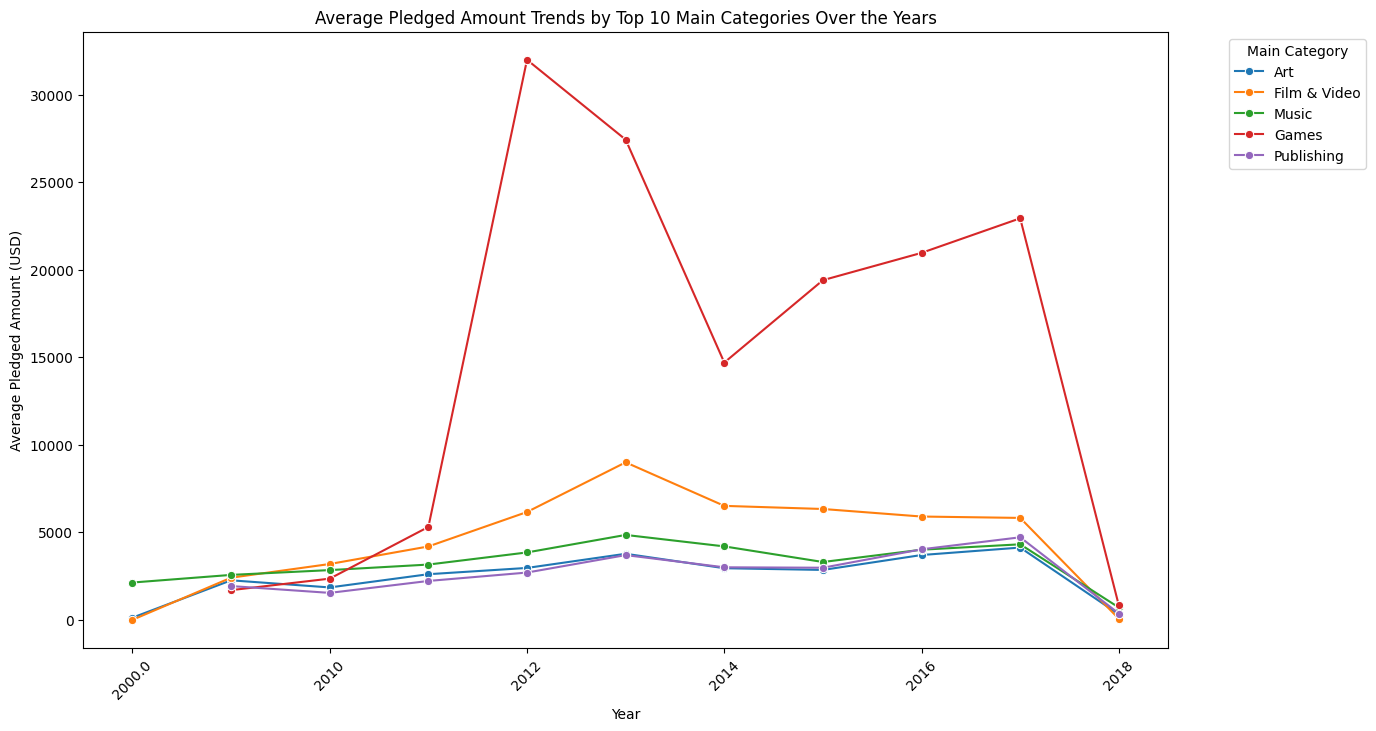

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, desc, count

# Identify the top 10 main categories by the total number of successful projects
top_5_categories = data.filter(col('state') == 'successful') \
    .groupby('main_category') \
    .agg(count('*').alias('successful_count')) \
    .orderBy(desc('successful_count')) \
    .limit(5) \
    .select('main_category') \
    .rdd.flatMap(lambda x: x).collect()

# Filter the original DataFrame to include only the top 10 categories
data_top_5 = data.filter(col('main_category').isin(top_5_categories))

# Filter out unrealistic year values
data_filtered_years = data_top_5.filter((col('launch_year').cast('integer') >= 2000) & (col('launch_year').cast('integer') <= 2023))

# Calculate average pledge amount per main category per year for top 10 categories
average_pledge_by_category_year = data_filtered_years.groupby(['launch_year', 'main_category']) \
    .agg({'usd_pledged_real': 'mean'}) \
    .withColumnRenamed('avg(usd_pledged_real)', 'average_pledged_amount') \
    .orderBy('launch_year', 'main_category')

# Convert to Pandas DataFrame for visualization
average_pledge_by_category_year_pd = average_pledge_by_category_year.toPandas()

# Plot average pledge trends by main category
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_pledge_by_category_year_pd, x='launch_year', y='average_pledged_amount', hue='main_category', marker='o')

# Fix x-axis values
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.title('Average Pledged Amount Trends by Top 5 Main Categories Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Pledged Amount (USD)')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


3**-What is the distribution of the number of backers across top succesful main categories?**

<ipython-input-35-1dfef370edd1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_backers_by_category_pd, x='average_backers', y='main_category', palette='viridis')


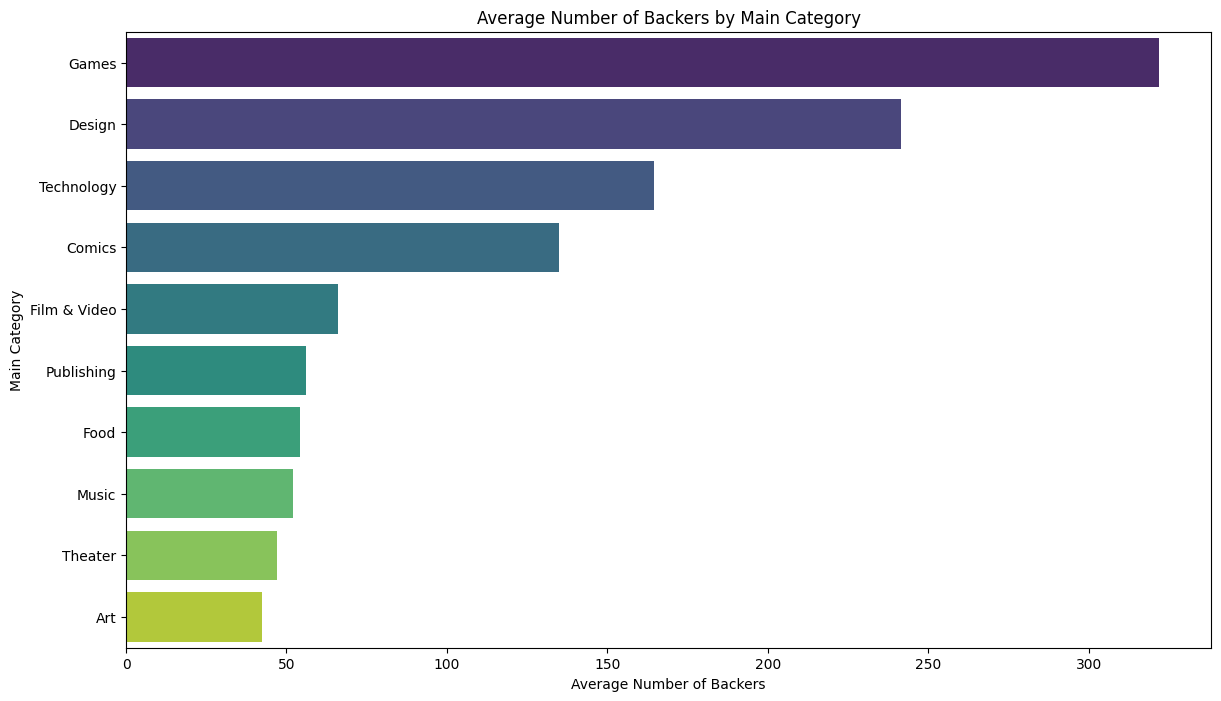

In [35]:
# Calculate average number of backers per main category

top_10_categories = data.filter(col('state') == 'successful') \
    .groupby('main_category') \
    .agg(count('*').alias('successful_count')) \
    .orderBy(desc('successful_count')) \
    .limit(10) \
    .select('main_category') \
    .rdd.flatMap(lambda x: x).collect()

# Filter the original DataFrame to include only the top 10 categories
data_top_10 = data.filter(col('main_category').isin(top_10_categories))

average_backers_by_category = data_top_10.groupby('main_category') \
    .agg({'backers': 'mean'}) \
    .withColumnRenamed('avg(backers)', 'average_backers') \
    .orderBy(desc('average_backers'))

# Convert to Pandas DataFrame for visualization
average_backers_by_category_pd = average_backers_by_category.toPandas()

# Plot average number of backers by main category
plt.figure(figsize=(14, 8))
sns.barplot(data=average_backers_by_category_pd, x='average_backers', y='main_category', palette='viridis')
plt.title('Average Number of Backers by Main Category')
plt.xlabel('Average Number of Backers')
plt.ylabel('Main Category')
plt.show()


In [69]:
spark.stop()

# Data Prepration(Model)

In [37]:
model_data=pd.read_csv('cleaned_kickstarter_data.csv')


In [38]:
model_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378657 entries, 0 to 378656
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378657 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378657 non-null  object 
 3   main_category     378657 non-null  object 
 4   currency          378657 non-null  object 
 5   deadline          378657 non-null  object 
 6   goal              378657 non-null  float64
 7   launched          378657 non-null  object 
 8   pledged           378657 non-null  float64
 9   state             378657 non-null  object 
 10  backers           378657 non-null  int64  
 11  country           378657 non-null  object 
 12  usd pledged       378657 non-null  float64
 13  usd_pledged_real  378657 non-null  float64
 14  usd_goal_real     378657 non-null  float64
 15  launch_year       378657 non-null  int64  
 16  launch_month      37

In [41]:
model_data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch_year,launch_month,state_binary
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378652,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,2014,9,0
378653,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,2011,6,0
378654,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,2010,7,0
378655,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,2016,1,0


In [39]:
from sklearn.preprocessing import LabelEncoder


In [43]:
label_encoder = LabelEncoder()
categorical_columns = [ 'category', 'main_category', 'currency', 'country']
for column in categorical_columns:
    model_data[column] = label_encoder.fit_transform(model_data[column])

# Display the first few rows of the encoded DataFrame
print(model_data.head())

           ID                                               name  category  \
0  1000002330                    The Songs of Adelaide & Abullah       108   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET        93   
2  1000004038                                     Where is Hank?        93   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album        90   
4  1000011046  Community Film Project: The Art of Neighborhoo...        55   

   main_category  currency    deadline     goal             launched  pledged  \
0             12         5  2015-10-09   1000.0  2015-08-11 12:12:28      0.0   
1              6        13  2017-11-01  30000.0  2017-09-02 04:43:57   2421.0   
2              6        13  2013-02-26  45000.0  2013-01-12 00:20:50    220.0   
3             10        13  2012-04-16   5000.0  2012-03-17 03:24:11      1.0   
4              6        13  2015-08-29  19500.0  2015-07-04 08:35:03   1283.0   

      state  backers  country  usd pledged  

In [47]:
filtered_data = model_data[model_data['state'] != 'live']

# Count "successful" states as outcome = 1, every other state as outcome = 0
filtered_data['state_binary_updated'] = filtered_data['state'].apply(lambda x: 1 if x == 'successful' else 0)

<ipython-input-47-ca65f7775666>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['state_binary_updated'] = filtered_data['state'].apply(lambda x: 1 if x == 'successful' else 0)


In [52]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375858 entries, 0 to 378656
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    375858 non-null  int64  
 1   name                  375858 non-null  object 
 2   category              375858 non-null  int64  
 3   main_category         375858 non-null  int64  
 4   currency              375858 non-null  int64  
 5   deadline              375858 non-null  object 
 6   goal                  375858 non-null  float64
 7   launched              375858 non-null  object 
 8   pledged               375858 non-null  float64
 9   state                 375858 non-null  object 
 10  backers               375858 non-null  int64  
 11  country               375858 non-null  int64  
 12  usd pledged           375858 non-null  float64
 13  usd_pledged_real      375858 non-null  float64
 14  usd_goal_real         375858 non-null  float64
 15  launc

In [54]:
filtered_data.to_csv('Model_kickstarter_data.csv', index=False)

#Machine Learning Models:

In [70]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("category", IntegerType(), True),
    StructField("main_category", IntegerType(), True),
    StructField("currency", IntegerType(), True),
    StructField("deadline", StringType(), True),
    StructField("goal", FloatType(), True),
    StructField("launched", StringType(), True),
    StructField("pledged", FloatType(), True),
    StructField("state", StringType(), True),
    StructField("backers", IntegerType(), True),
    StructField("country", IntegerType(), True),
    StructField("usd pledged", FloatType(), True),
    StructField("usd_pledged_real", FloatType(), True),
    StructField("usd_goal_real", FloatType(), True),
    StructField("launch_year", IntegerType(), True),
    StructField("launch_month", IntegerType(), True),
    StructField("state_binary", IntegerType(), True),
    StructField("state_binary_updated", IntegerType(), True)
])


In [71]:

spark = SparkSession.builder \
    .appName("Model_Data") \
    .getOrCreate()

# Load the dataset with the defined schema
data_Model = spark.read.csv('Model_kickstarter_data.csv', header=True, schema=schema)

# Check the schema to ensure correct data types
data_Model.printSchema()


root
 |-- ID: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- category: integer (nullable = true)
 |-- main_category: integer (nullable = true)
 |-- currency: integer (nullable = true)
 |-- deadline: string (nullable = true)
 |-- goal: float (nullable = true)
 |-- launched: string (nullable = true)
 |-- pledged: float (nullable = true)
 |-- state: string (nullable = true)
 |-- backers: integer (nullable = true)
 |-- country: integer (nullable = true)
 |-- usd pledged: float (nullable = true)
 |-- usd_pledged_real: float (nullable = true)
 |-- usd_goal_real: float (nullable = true)
 |-- launch_year: integer (nullable = true)
 |-- launch_month: integer (nullable = true)
 |-- state_binary: integer (nullable = true)
 |-- state_binary_updated: integer (nullable = true)



# Assign Features and Label:

In [72]:
from pyspark.ml.feature import VectorAssembler

# List of feature columns
feature_cols = ['goal', 'backers', 'usd_pledged_real', 'usd_goal_real', 'launch_year', 'launch_month',
                'category', 'main_category', 'currency', 'country']

# Assemble feature columns
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features" , handleInvalid="skip")
data_final = assembler.transform(data_Model)

# Select only the necessary columns for modeling
model_data = data_final.select("features", "state_binary_updated")


# Train and Test the dataset:

In [73]:
train_data, test_data = model_data.randomSplit([0.8, 0.2], seed=1234)


# Intialize Models:
**And fit all models and get accuracy**

In [74]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [75]:
# Logistic Regression

lr = LogisticRegression(labelCol="state_binary_updated", featuresCol="features")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
lr_auc = BinaryClassificationEvaluator(labelCol="state_binary_updated").evaluate(lr_predictions)
print(f"Logistic Regression AUC: {lr_auc}")

Logistic Regression AUC: 0.9877597644133282


In [76]:
# Decision Tree
dt = DecisionTreeClassifier(labelCol="state_binary_updated", featuresCol="features")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
dt_auc = BinaryClassificationEvaluator(labelCol="state_binary_updated").evaluate(dt_predictions)
print(f"Decision Tree AUC: {dt_auc}")

Decision Tree AUC: 0.9847769644375177


In [77]:
rf = RandomForestClassifier(labelCol="state_binary_updated", featuresCol="features")
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)
rf_auc = BinaryClassificationEvaluator(labelCol="state_binary_updated").evaluate(rf_predictions)
print(f"Random Forest AUC: {rf_auc}")

Random Forest AUC: 0.9925469719279244


** **

**Random Forest Classifier has the best Accuracy among the all models**